# Project Task 1
## Downloading Python Repositories

Extra Credit - Downloading the following python repositories in an automated way using Python

1. matplotlib: A plotting library

2. scikit-learn: A machine learning library

3. numpy: A scientific computing library

4. pandas: A columnar data analysis library

5. django: A web framework

6. scipy: A scientific computing library

7. flask: A micro web framework

8. requests: A HTTP requests library

9. ansible: An IT automation platform

10. sentry: A crash reporting utility

11. scrapy: A web scraper

12. Mailpile: An email client

13. sshuttle: A proxy server

14. salt: An IT automation platform

15. NewsBlur: A newsreader

16. beets: A music library manager

In [1]:
import os

# Create the 'Python Repositories' directory if it doesn't already exist
if not os.path.exists('Python Repositories'):
    os.makedirs('Python Repositories')

import subprocess

# List of regular link repositories to download
repos = ['matplotlib', 'scikit-learn', 'numpy', 'django', 'scipy', 'ansible', 'scrapy', 'sshuttle']

# Clone each repository into the 'Python Repositories' directory
for repo in repos:
    # Checking if the repository already exists
    if not os.path.exists(f'Python Repositories/{repo}'):
        subprocess.run(['git', 'clone', f'https://github.com/{repo}/{repo}.git', f'Python Repositories/{repo}'])
    else:
        print(f'Python Repositories/{repo} already exists')

# List of non regular link repositories to download
additional_repos = ['https://github.com/pandas-dev/pandas', 'https://github.com/pallets/flask', 'https://github.com/psf/requests', 'https://github.com/getsentry/sentry', 'https://github.com/saltstack/salt', 'https://github.com/beetbox/beets']

# Clone each repository into the 'Python Repositories' directory
for repo in additional_repos:
    # Checking if the repository already exists
    if not os.path.exists(f'Python Repositories/{repo.split("/")[-1]}'):
        subprocess.run(['git', 'clone', repo, f'Python Repositories/{repo.split("/")[-1]}'])
    else:
        print(f'Python Repositories/{repo.split("/")[-1]} already exists')


Python Repositories/matplotlib already exists
Python Repositories/scikit-learn already exists
Python Repositories/numpy already exists
Python Repositories/django already exists
Python Repositories/scipy already exists
Python Repositories/ansible already exists
Python Repositories/scrapy already exists
Python Repositories/sshuttle already exists
Python Repositories/pandas already exists
Python Repositories/flask already exists
Python Repositories/requests already exists
Python Repositories/sentry already exists
Python Repositories/salt already exists
Python Repositories/beets already exists


In [2]:
# Using the python_crawler.py file to crawl through the repositories looking for Python files
import python_crawler

# Declaring the path of the 'Python Repositories' directory
path = 'Python Repositories'

# Creating an object of the PythonCrawler class
crawler = python_crawler.PythonCrawler(path)

# Crawl through the repositories
crawler.crawl()

# Print the paths of all the .py files
crawler.print_py_files()

# Aggregate all the py files in a single file
crawler.aggregate_py_files()

Python Repositories/flask/tests/test_basic.py
Python Repositories/flask/tests/conftest.py
Python Repositories/flask/tests/test_converters.py
Python Repositories/flask/tests/test_logging.py
Python Repositories/flask/tests/test_signals.py
Python Repositories/flask/tests/test_async.py
Python Repositories/flask/tests/test_session_interface.py
Python Repositories/flask/tests/test_instance_config.py
Python Repositories/flask/tests/test_views.py
Python Repositories/flask/tests/test_json_tag.py
Python Repositories/flask/tests/test_subclassing.py
Python Repositories/flask/tests/test_reqctx.py
Python Repositories/flask/tests/test_blueprints.py
Python Repositories/flask/tests/test_config.py
Python Repositories/flask/tests/test_user_error_handler.py
Python Repositories/flask/tests/test_helpers.py
Python Repositories/flask/tests/test_json.py
Python Repositories/flask/tests/test_cli.py
Python Repositories/flask/tests/test_templating.py
Python Repositories/flask/tests/test_appctx.py
Python Repositori

In [3]:
# Importing the required libraries
import pandas as pd
import numpy as np
import gensim
import os
import string
from nltk.tokenize import RegexpTokenizer
from nltk import sent_tokenize
from gensim.utils import simple_preprocess

code = []

with open('aggregate_py_files.py', 'r') as f:
        corpus = f.read()
        raw_sent = sent_tokenize(corpus)
        for sent in raw_sent:
            code.append(simple_preprocess(sent))

# Printing the number of lines of code and the number of tokens (words) in the file
print(f'Number of lines of code: {len(code)}')
print(f'Number of tokens (words): {len([token for sent in code for token in sent])}')

Number of lines of code: 305016
Number of tokens (words): 14159904


In [4]:
# Train your Gensim Word2Vec model with the tokenized lines of code
model = gensim.models.Word2Vec(
    window=10,
    min_count=2
)

In [5]:
model.build_vocab(code)

In [6]:
model.train(code, total_examples=model.corpus_count, epochs=model.epochs)

(60004236, 70799520)

In [7]:
# Deleting the old model if it exists

if os.path.exists('python2vec.model'):
    os.remove('python2vec.model')

# Saving the model as python2vec.model

model.save('python2vec.model')

In [8]:
# Explore the trained model by examining the closest_words to some Python keywords like “for” and “if.”  Also explore the similarity of some popular identifier names like “math” and “numpy” in your notebook.

# Explore the closest words to "for"
print(model.wv.most_similar('for'))

# Printing an empty line
print()

# Explore the closest words to "if"
print(model.wv.most_similar('if'))

# Printing an empty line
print()

# Explore the similarity of "math" and "numpy"
print(model.wv.similarity('math', 'numpy'))


[('addition', 0.5433377623558044), ('case', 0.5117728114128113), ('directions', 0.45536527037620544), ('expected_semver', 0.4507758915424347), ('items', 0.4503110349178314), ('reporter_fields', 0.4449424147605896), ('other_rule', 0.44259902834892273), ('rows_jl', 0.4356515109539032), ('part_mask', 0.42563989758491516), ('reversed', 0.4237636923789978)]

[('elif', 0.6969890594482422), ('else', 0.6056801676750183), ('and', 0.563362717628479), ('continue', 0.5131071209907532), ('not', 0.5069737434387207), ('or', 0.5008803009986877), ('url_auth', 0.4773867726325989), ('warn_external', 0.47047126293182373), ('not_rel', 0.4688645601272583), ('get_pkcs', 0.4590660631656647)]

0.18488088


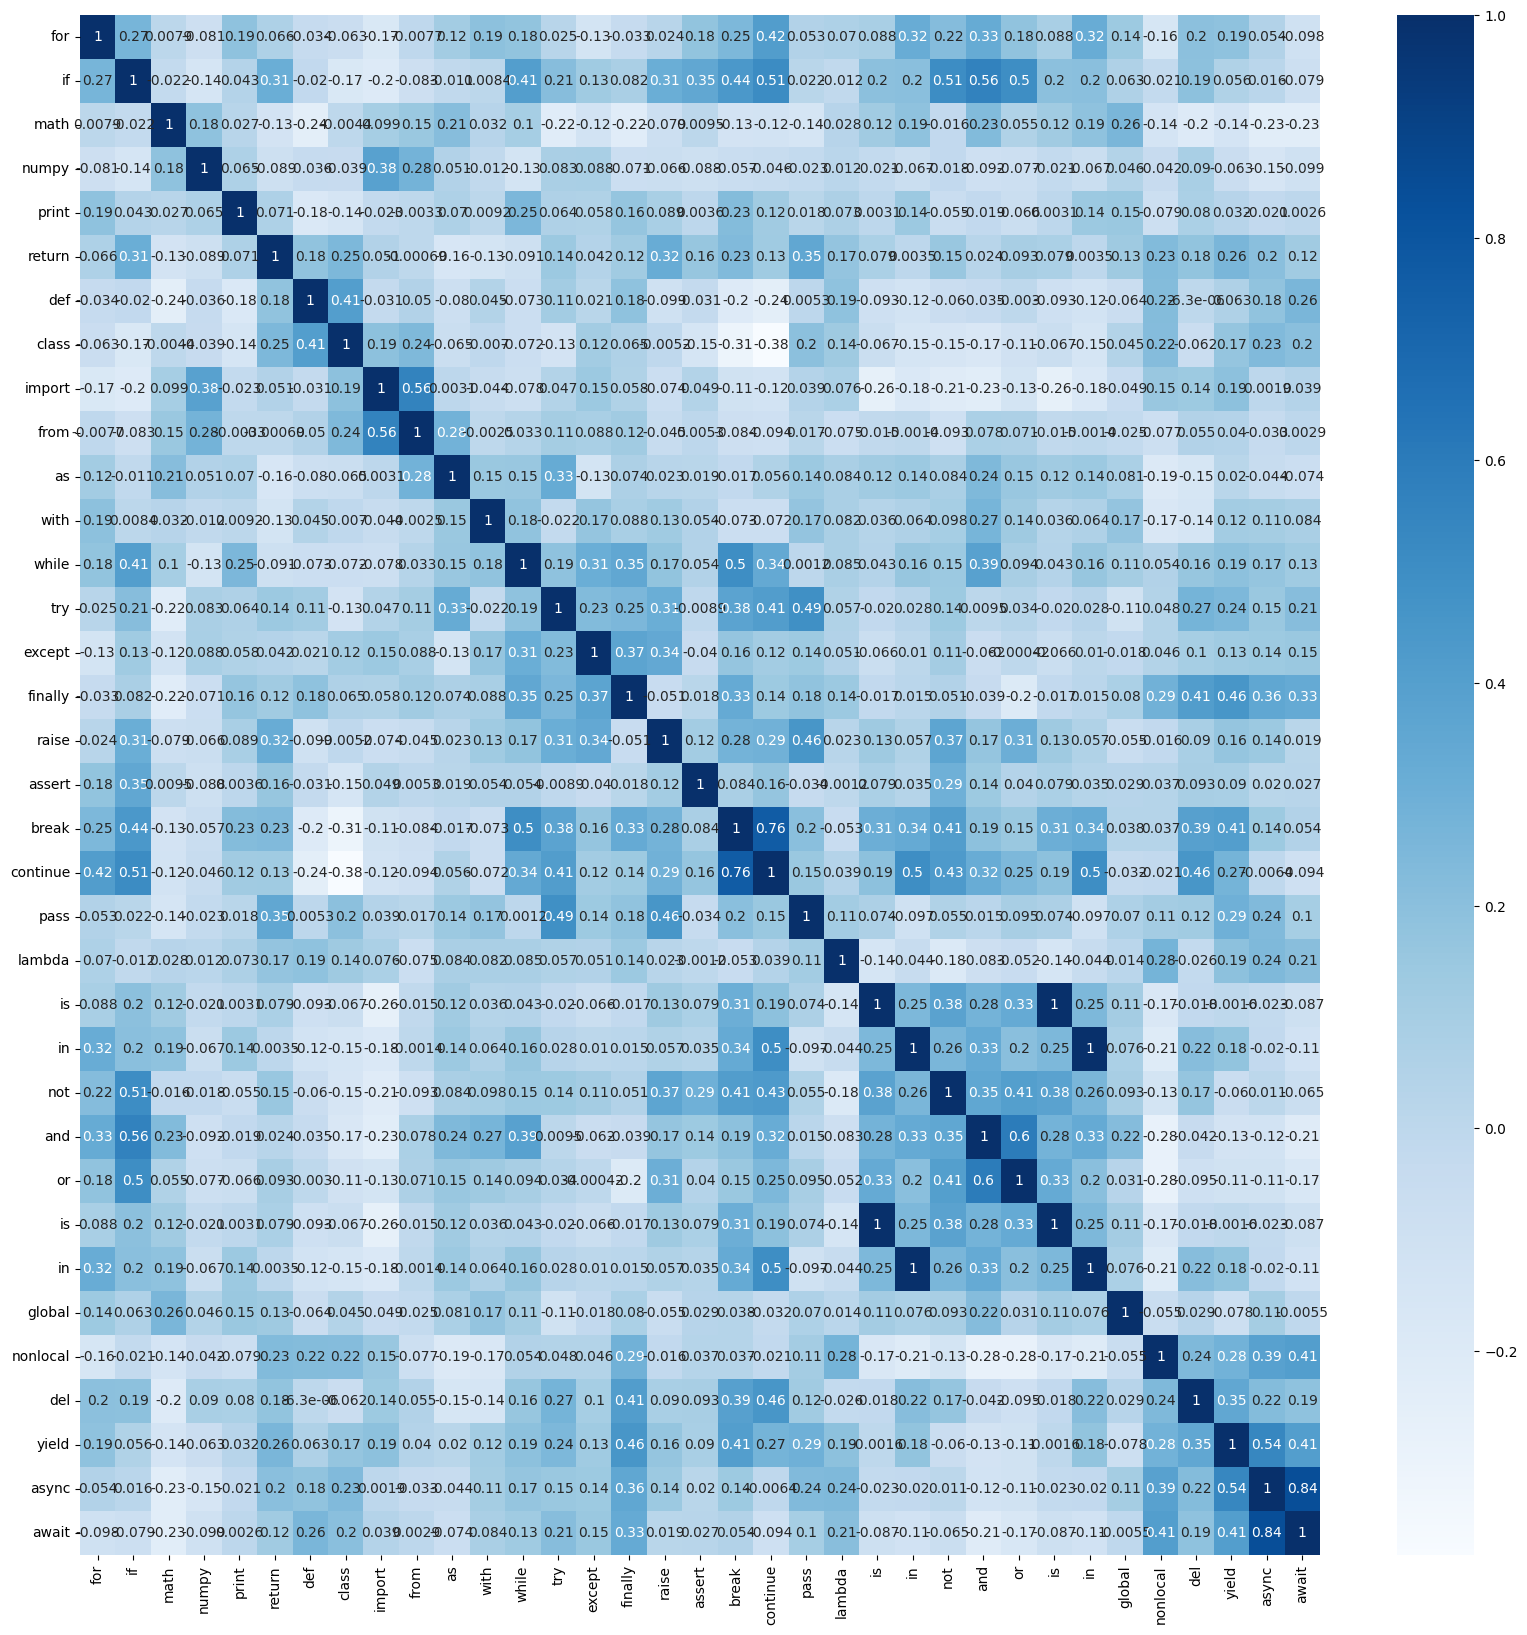

In [9]:
# 1.1. Creating a Word Similarity Heatmap: A heatmap can be created to show the similarity scores between various pairs of words in the model. This can help visualize which words are more similar to each other and which ones are not.

# Importing the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Creating a list of words to be used in the heatmap
words = ['for', 'if', 'math', 'numpy', 'print', 'return', 'def', 'class', 'import', 'from', 'as', 'with', 'while', 'try', 'except', 'finally', 'raise', 'assert', 'break', 'continue', 'pass', 'lambda', 'is', 'in', 'not', 'and', 'or', 'is', 'in', 'global', 'nonlocal', 'del', 'yield', 'async', 'await']

# Creating a dataframe with the similarity scores between the words
df = pd.DataFrame(index=words, columns=words, dtype='float')
for i in words:
    for j in words:
        df.loc[i, j] = model.wv.similarity(i, j)

# Replacing NaN values with 0
df.fillna(0, inplace=True)

# Creating a heatmap of the dataframe
plt.figure(figsize=(20, 20))
sns.heatmap(df, annot=True, cmap='Blues')
plt.show()


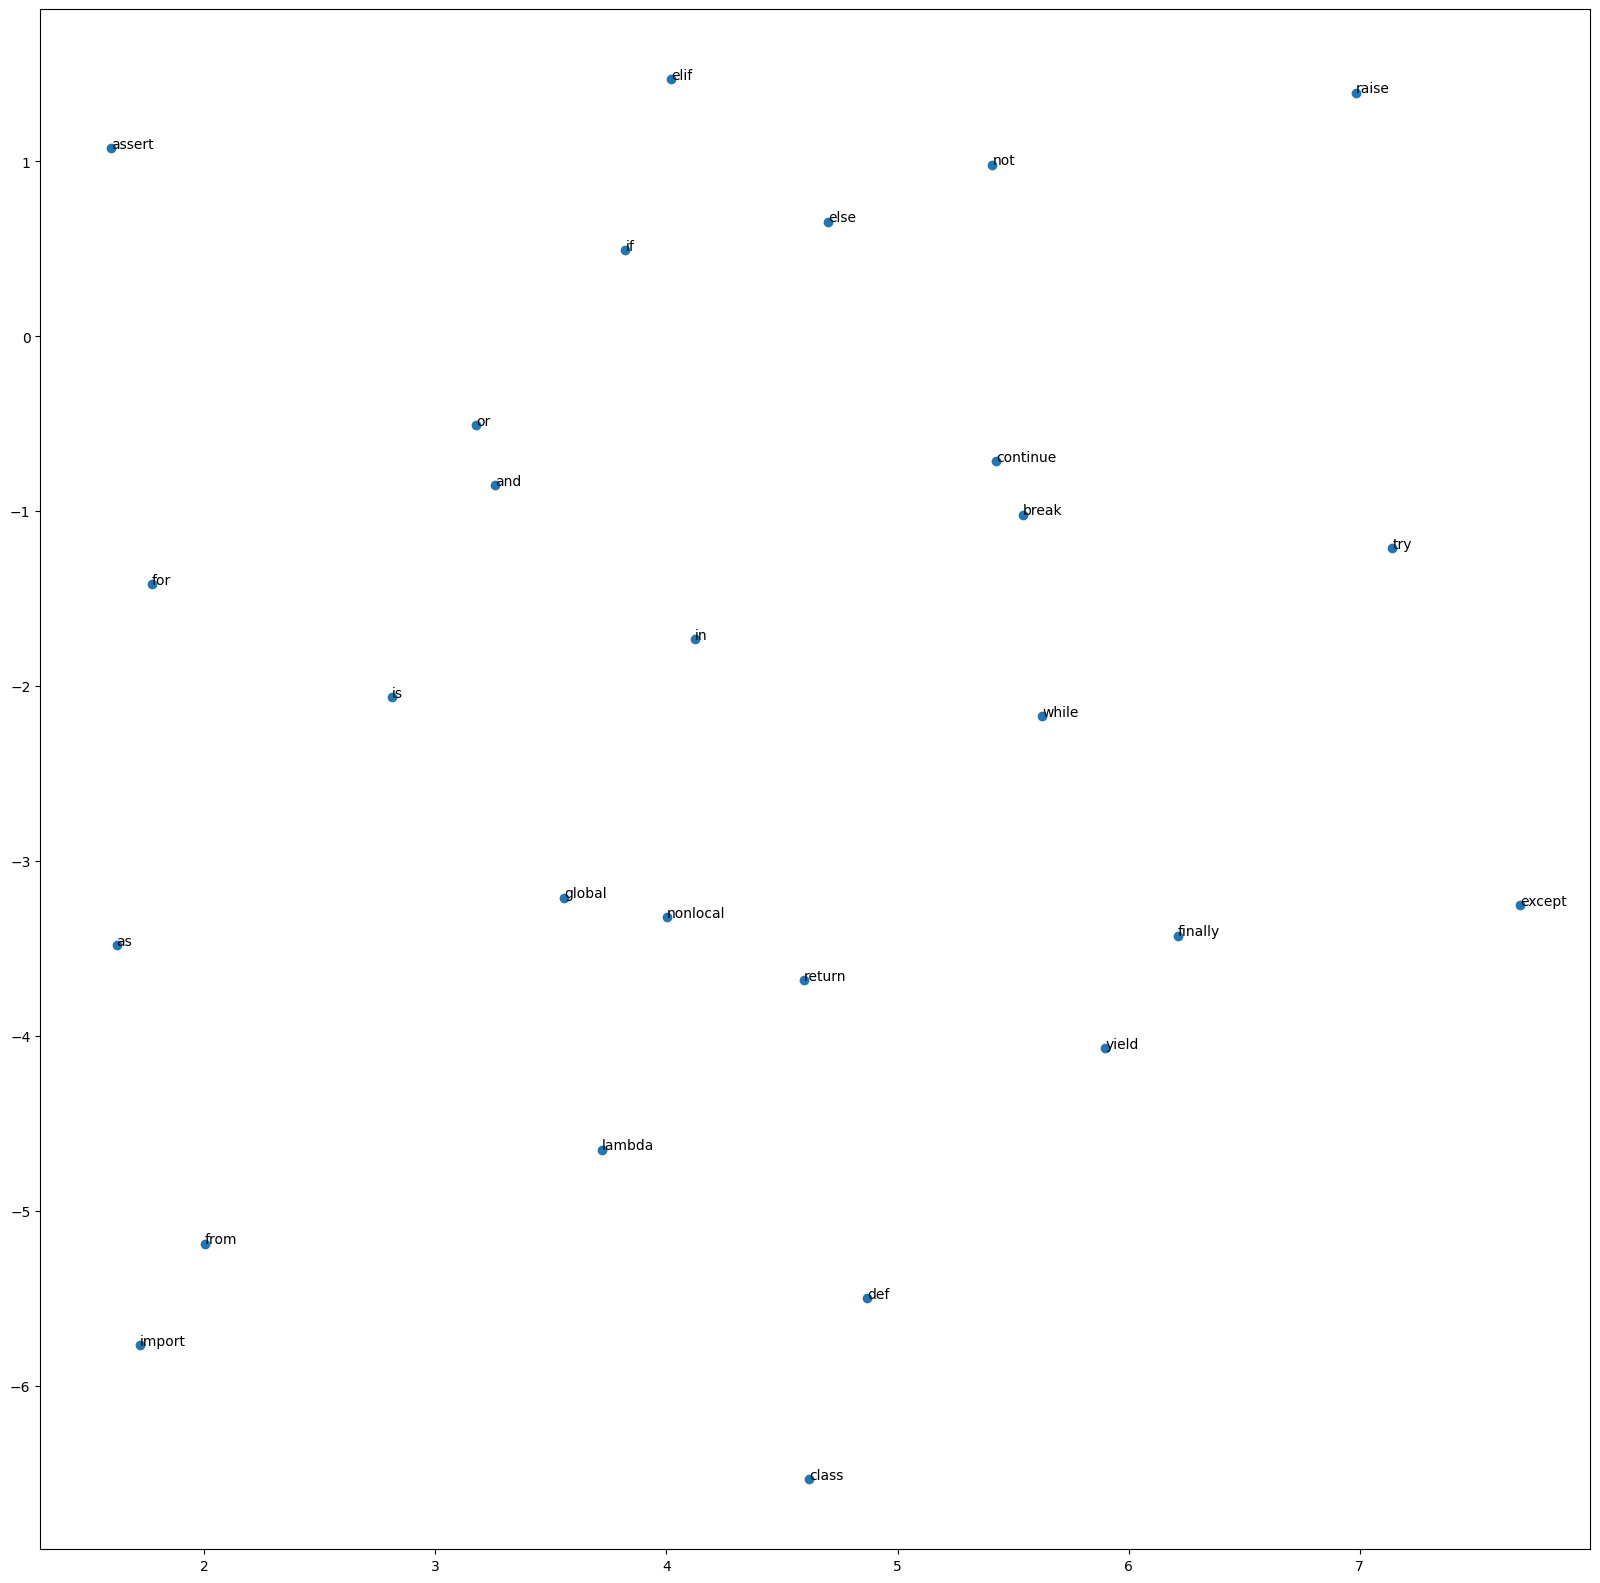

In [10]:
# 1.2. Word Cluster Visualization: A scatter plot can be created to visualize the word clusters created by the model. This can help understand which words are most similar and which ones are not, and which groups of words tend to occur together.

# Importing the required libraries
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Creating a list of closely related Python identifiers to be used in the scatter plot
identifiers = ['for', 'if', 'elif', 'else', 'while', 'break', 'continue', 'try', 'except', 'finally', 'raise', 'assert', 'def', 'class', 'return', 'yield', 'import', 'from', 'as', 'global', 'nonlocal', 'lambda', 'is', 'in', 'not', 'and', 'or']

# Creating a numpy array of vectors for the Python identifiers
vectors = []
for word in identifiers:
    if word in model.wv.key_to_index:
        vectors.append(model.wv.get_vector(word))
    else:
        print(f'{word} not in vocabulary')

vectors = np.array(vectors)

# Creating a TSNE object
tsne = TSNE(n_components=2, random_state=0, perplexity=10)

# Creating a dataframe with the vectors
df = pd.DataFrame(tsne.fit_transform(vectors), index=[word for word in identifiers if word in model.wv.key_to_index], columns=['x', 'y'])

# Creating a scatter plot of the dataframe
plt.figure(figsize=(20, 20))

for identifier, pos in df.iterrows():
    plt.annotate(identifier, pos)

plt.scatter(df['x'], df['y'])

plt.show()



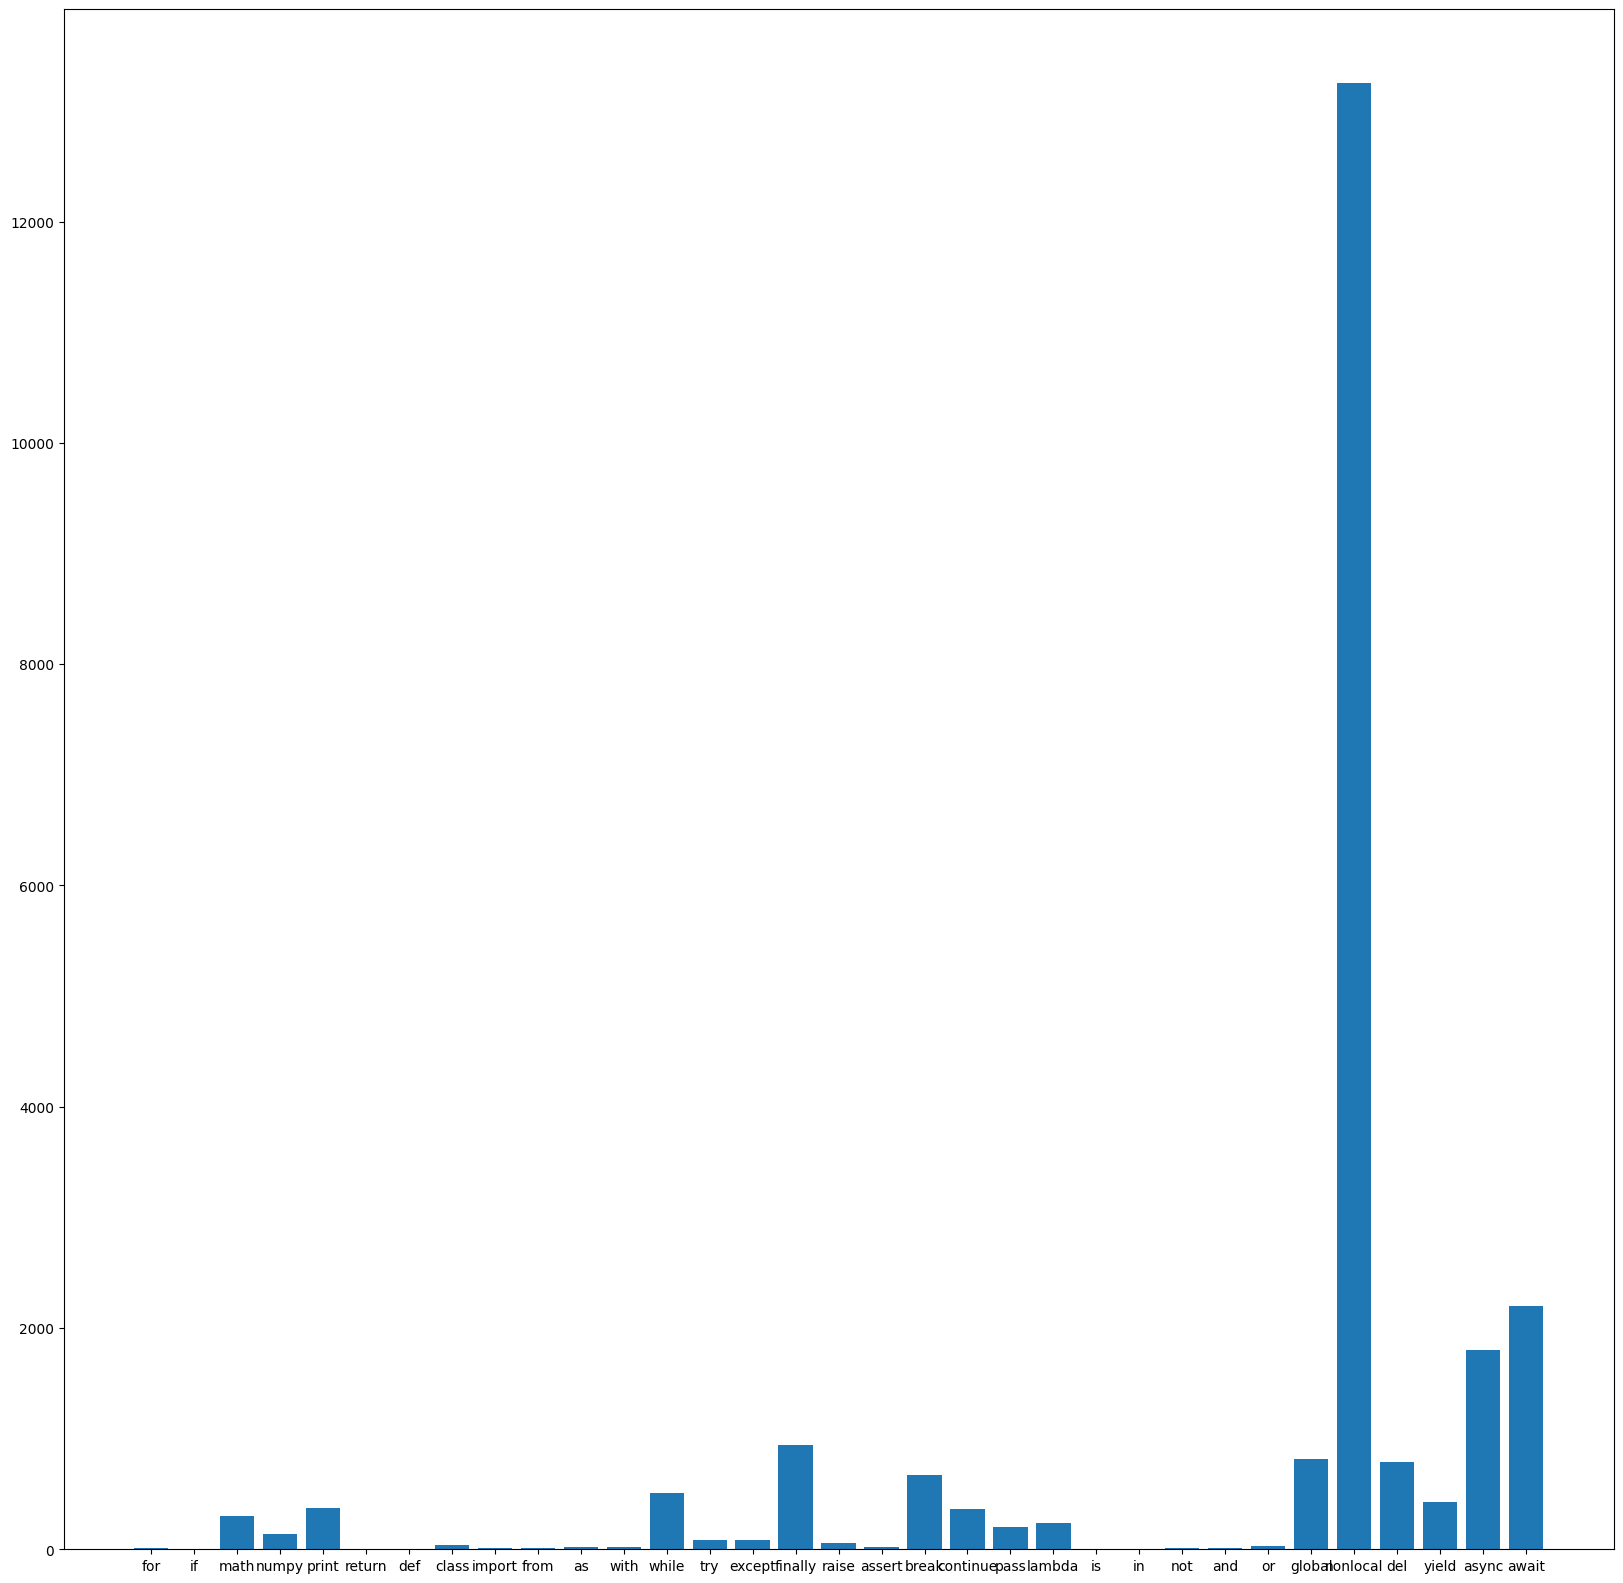

In [11]:
# 1.3. Word Frequency Distribution: A bar chart can be created to visualize the frequency distribution of the words in the model. This can help identify which words occur most frequently and which ones occur less frequently.

# Importing the required libraries
import matplotlib.pyplot as plt
import pandas as pd

# Creating a list of words to be used in the bar chart
words = ['for', 'if', 'math', 'numpy', 'print', 'return', 'def', 'class', 'import', 'from', 'as', 'with', 'while', 'try', 'except', 'finally', 'raise', 'assert', 'break', 'continue', 'pass', 'lambda', 'is', 'in', 'not', 'and', 'or', 'is', 'in', 'global', 'nonlocal', 'del', 'yield', 'async', 'await']

freq_dict = {word:model.wv.key_to_index[word] for word in words}

df = pd.DataFrame.from_dict(freq_dict, orient='index', columns=['frequency'])

plt.figure(figsize=(20, 20))

plt.bar(df.index, df['frequency'])

plt.show()

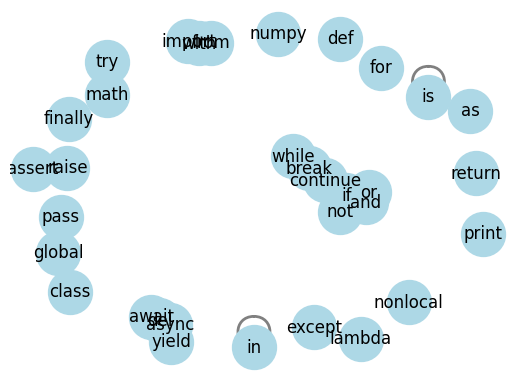

In [12]:
# 1.4. Word Frequency Distribution: A bar chart can be created to visualize the frequency distribution of the words in the model. This can help identify which words occur most frequently and which ones occur less frequently.

import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.Graph()

# Create a list of words to be included in the network
words = ['for', 'if', 'math', 'numpy', 'print', 'return', 'def', 'class', 'import', 'from', 'as', 'with', 'while', 'try', 'except', 'finally', 'raise', 'assert', 'break', 'continue', 'pass', 'lambda', 'is', 'in', 'not', 'and', 'or', 'is', 'in', 'global', 'nonlocal', 'del', 'yield', 'async', 'await']

# Add nodes to the graph
for word in words:
    G.add_node(word)

# Add edges to the graph based on cosine similarity between word vectors
for i, source in enumerate(words):
    for j, target in enumerate(words):
        if i < j:
            similarity = model.wv.similarity(source, target)
            if similarity > 0.5:
                G.add_edge(source, target, weight=similarity)

# Draw the network graph
pos = nx.spring_layout(G, seed=0)
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=1000)
nx.draw_networkx_edges(G, pos, width=2, edge_color='gray')
nx.draw_networkx_labels(G, pos, font_size=12, font_family='sans-serif')
plt.axis('off')
plt.show()


In [13]:
# Plotting a 3D scatter plot of the word vectors with plotly.express
import plotly.express as px

# Creating a list of words to be used in the scatter plot
words = ['for', 'if', 'math', 'numpy', 'print', 'return', 'def', 'class', 'import', 'from', 'as', 'with', 'while', 'try', 'except', 'finally', 'raise', 'assert', 'break', 'continue', 'pass', 'lambda', 'is', 'in', 'not', 'and', 'or', 'is', 'in', 'global', 'nonlocal', 'del', 'yield', 'async', 'await']

# Creating a numpy array of vectors for the Python identifiers
vectors = []
for word in words:
    if word in model.wv.key_to_index:
        vectors.append(model.wv.get_vector(word)[:3]) # select first 3 dimensions
    else:
        print(f'{word} not in vocabulary')

vectors = np.array(vectors)

# Creating a dataframe with the vectors
df = pd.DataFrame(vectors, index=[word for word in words if word in model.wv.key_to_index], columns=['x', 'y', 'z'])

# Creating a scatter plot of the dataframe
fig = px.scatter_3d(df, x='x', y='y', z='z', text=df.index)

fig.update_traces(textposition='top center')

fig.update_layout(width=800, height=800)

fig.show()


# Extension - 3

### Frequency of Identifier Names from an Abstract Syntax Tree (AST)

In [17]:
# Using the python_crawler.py file to crawl through the repositories looking for Python files
import python_crawler

# Declaring the path of the 'Python Repositories' directory
path = 'Python Repositories'

# Creating an object of the PythonCrawler class
crawler = python_crawler.PythonCrawler(path)

# Crawl through the repositories
files = crawler.crawl()

import ast

identifiers = []

for file in files:

    if file != 'Python Repositories/NewsBlur/flask_monitor/flask_settings.py' and file != '/Users/chandrachudgowda/Library/Mobile Documents/com~apple~CloudDocs/Colby/Spring 2023/CS421/Projects/Project 2/CS421-cmg-project2/Python Repositories/NewsBlur/vendor/cjson/jsontest.py':

        with open(file, 'r') as f:

            print(f'Processing {file}...')

            code = f.read() 

            # FIxing the inconsistent use of tabs and spaces in the code
            code = code.replace('\t', '    ')

            # get the abstract syntax tree of the file
            ast_tree = ast.parse(code)

            # get a list of all identifiers in the ast tree
            for node in ast.walk(ast_tree):
                if isinstance(node, ast.Name):
                    identifiers.append(node.id)
    

Processing Python Repositories/flask/tests/test_basic.py...
Processing Python Repositories/flask/tests/conftest.py...
Processing Python Repositories/flask/tests/test_converters.py...
Processing Python Repositories/flask/tests/test_logging.py...
Processing Python Repositories/flask/tests/test_signals.py...
Processing Python Repositories/flask/tests/test_async.py...
Processing Python Repositories/flask/tests/test_session_interface.py...
Processing Python Repositories/flask/tests/test_instance_config.py...
Processing Python Repositories/flask/tests/test_views.py...
Processing Python Repositories/flask/tests/test_json_tag.py...
Processing Python Repositories/flask/tests/test_subclassing.py...
Processing Python Repositories/flask/tests/test_reqctx.py...
Processing Python Repositories/flask/tests/test_blueprints.py...
Processing Python Repositories/flask/tests/test_config.py...
Processing Python Repositories/flask/tests/test_user_error_handler.py...
Processing Python Repositories/flask/tests

In [19]:
# Find the 50 most common identifiers in Python from the frequencies you calculated in the previous step.
from collections import Counter

# Find the 50 most common identifiers in Python from the frequencies you calculated in the previous step.
counter = Counter(identifiers)

# Printing an empty line
print()

# Using the Python2Vec model you built previously, calculate the similarity between each pair of the 50 most common identifiers and highlight interesting patterns in your report.

# Print the single highest similarity pair for each of the 50 most common identifiers
for identifier in counter.most_common(50):
    if identifier[0] in model.wv:
        print(f'Identifier: {identifier[0]}')
        print(f'Highest Similarity Pair: {model.wv.most_similar(identifier[0])[0]}')
        print()

# Enhance the way you flag identifiers as similar/dissimilar until you are satisfied with the results.



Identifier: self
Highest Similarity Pair: ('super', 0.7117697596549988)

Identifier: np
Highest Similarity Pair: ('a_f', 0.5995408892631531)

Identifier: ret
Highest Similarity Pair: ('newloc', 0.5952630043029785)

Identifier: result
Highest Similarity Pair: ('expected', 0.5587136745452881)

Identifier: pytest
Highest Similarity Pair: ('fixturedefs', 0.5704291462898254)

Identifier: expected
Highest Similarity Pair: ('result', 0.5587136745452881)

Identifier: name
Highest Similarity Pair: ('new_name', 0.5671014189720154)

Identifier: data
Highest Similarity Pair: ('events_results', 0.5407754182815552)

Identifier: str
Highest Similarity Pair: ('responses_mod', 0.5473197102546692)

Identifier: response
Highest Similarity Pair: ('status_code', 0.5972635746002197)

Identifier: df
Highest Similarity Pair: ('df_above_', 0.6012201905250549)

Identifier: len
Highest Similarity Pair: ('locs', 0.5720985531806946)

Identifier: tm
Highest Similarity Pair: ('makemultiindex', 0.5919007062911987)

